# Project 6

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [20]:
df = pd.read_csv('dataset/RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963# subtract to get date correct.
display(df)
display(f'Unique dates sampled: {len(df.Date.unique()), df.Date.unique().tolist()}')
display(f'Unique segments sampled: {len(df.Segment_id.unique()), df.Date.unique().tolist()}')
bySegment = df.groupby('Segment_id').count()
display(bySegment)
display(bySegment.std().Date)
display(bySegment.mean().Date)
# TODO: Drop segments with very few (or very many?) samples
df = df.groupby('Segment_id').filter(lambda x: len(x) >= 75)#gets rid of the segments with less than 75 samples

#Your task is to experiment with linear regression on this dataset. This is a difficult dataset to interpret, and most of your time will be looking at scatterplots, 
#looking at the data over time, looking at positional data, looking at individual segments, and doing background research. Just running regression and looking at the p values 
#for different attributes is most definitely not enough.


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000


'Unique dates sampled: (732, [16769, 16800, 16828, 16859, 16889, 16920, 16950, 16981, 17012, 17042, 17073, 17103, 17134, 17165, 17193, 17224, 17254, 17285, 17315, 17346, 17377, 17407, 17620, 17651, 17681, 17712, 17743, 17773, 17924, 17955, 17985, 18016, 18046, 18077, 18108, 18138, 18169, 18199, 18230, 18261, 18289, 18320, 18350, 18381, 18411, 18442, 18473, 18503, 18595, 18626, 18654, 18685, 18715, 18746, 18776, 18807, 18838, 18868, 18899, 18929, 18960, 18991, 19020, 19051, 19081, 19112, 19142, 19173, 19204, 19234, 19385, 19416, 19446, 19477, 19507, 19538, 35091, 35122, 35152, 35183, 35213, 35244, 35275, 35305, 35336, 35366, 35397, 35428, 35456, 35487, 35517, 35548, 35578, 35609, 35762, 35793, 35821, 35852, 35882, 35913, 35943, 35974, 36005, 36035, 36186, 36217, 36247, 36278, 36308, 36339, 36370, 36400, 36492, 36523, 36552, 36583, 36613, 36644, 22917, 22947, 22978, 23009, 23037, 23068, 23098, 23129, 23159, 23190, 23221, 23251, 23282, 23312, 23343, 23374, 23403, 23434, 23464, 23495, 2352

'Unique segments sampled: (42, [16769, 16800, 16828, 16859, 16889, 16920, 16950, 16981, 17012, 17042, 17073, 17103, 17134, 17165, 17193, 17224, 17254, 17285, 17315, 17346, 17377, 17407, 17620, 17651, 17681, 17712, 17743, 17773, 17924, 17955, 17985, 18016, 18046, 18077, 18108, 18138, 18169, 18199, 18230, 18261, 18289, 18320, 18350, 18381, 18411, 18442, 18473, 18503, 18595, 18626, 18654, 18685, 18715, 18746, 18776, 18807, 18838, 18868, 18899, 18929, 18960, 18991, 19020, 19051, 19081, 19112, 19142, 19173, 19204, 19234, 19385, 19416, 19446, 19477, 19507, 19538, 35091, 35122, 35152, 35183, 35213, 35244, 35275, 35305, 35336, 35366, 35397, 35428, 35456, 35487, 35517, 35548, 35578, 35609, 35762, 35793, 35821, 35852, 35882, 35913, 35943, 35974, 36005, 36035, 36186, 36217, 36247, 36278, 36308, 36339, 36370, 36400, 36492, 36523, 36552, 36583, 36613, 36644, 22917, 22947, 22978, 23009, 23037, 23068, 23098, 23129, 23159, 23190, 23221, 23251, 23282, 23312, 23343, 23374, 23403, 23434, 23464, 23495, 23

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Segment_id,,,,,,,
40,324,324,324,324,324,324,324
51,495,495,495,495,495,495,495
53,240,240,240,240,240,240,240
55,482,482,482,482,482,482,482
56,653,653,653,653,653,653,653
59,720,720,720,720,720,720,720
60,480,480,480,480,480,480,480
62,66,66,66,66,66,66,66
63,102,102,102,102,102,102,102


240.9335031947041

371.2142857142857

### Looking at scatterplots data over time, positional data, individual segments, and doing background research.

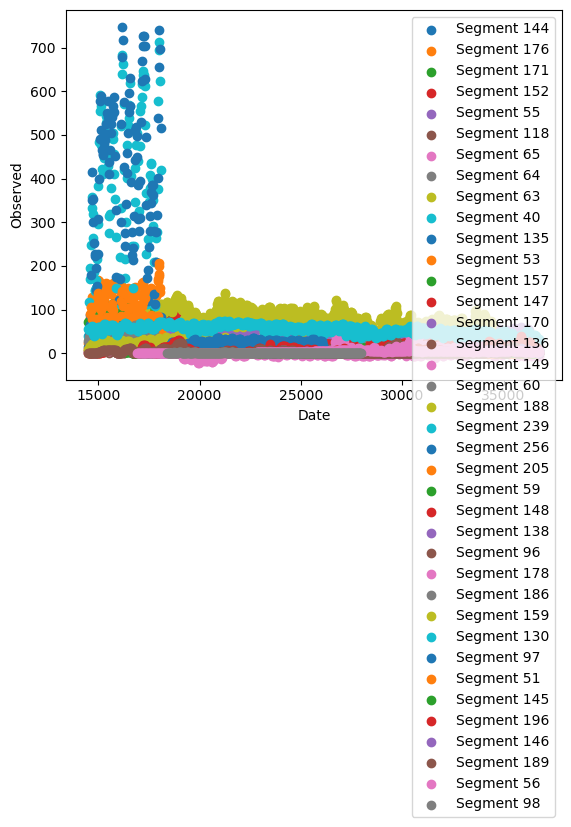

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Segment_id,,,,,,,
96,732,732,732,732,732,732,732
130,732,732,732,732,732,732,732


In [26]:
#First lets do some scatterplots
for segment_id in df['Segment_id'].unique():
  segment_data = df[df['Segment_id'] == segment_id]
  plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')
  
plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()
# First let's do some scatterplots
top_two_segments = bySegment.nlargest(2, 'Date')
display(top_two_segments)

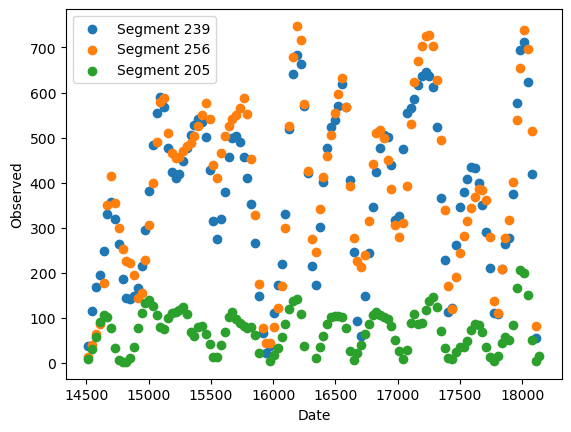

In [29]:
for segment_id in df['Segment_id'].unique():
    segment_data = df[df['Segment_id'] == segment_id]
    if segment_data['Observed'].max() > 200:
        plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')

plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()

In [ ]:
# here we see the top three best observed output, its intereting as they only go until 18000 while all the data goes to 35000

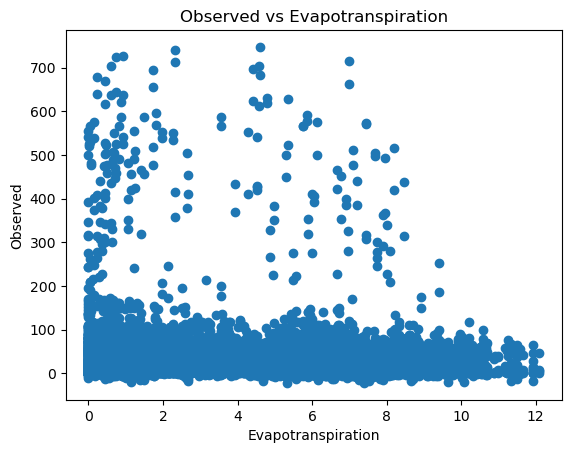

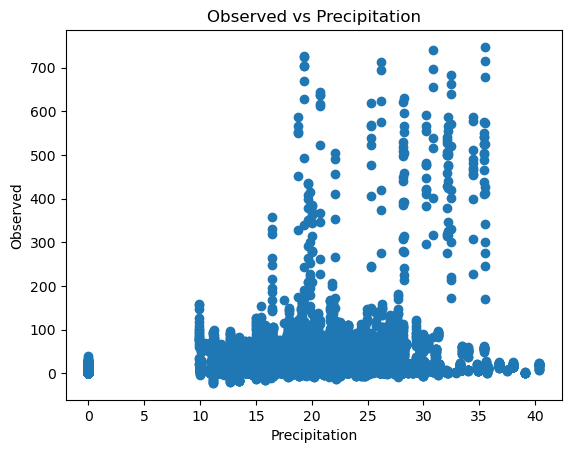

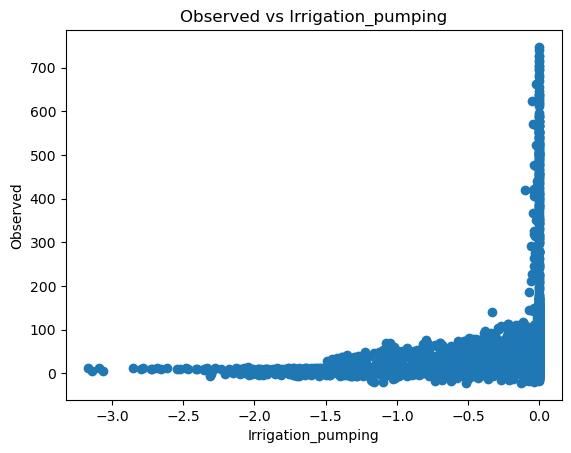

In [38]:
plt.scatter(df['Evapotranspiration'], df['Observed'])
plt.xlabel('Evapotranspiration')
plt.ylabel('Observed')
plt.title('Observed vs Evapotranspiration')
plt.show()

plt.scatter(df['Precipitation'], df['Observed'])
plt.xlabel('Precipitation')
plt.ylabel('Observed')
plt.title('Observed vs Precipitation')
plt.show()

plt.scatter(df['Irrigation_pumping'], df['Observed'])
plt.xlabel('Irrigation_pumping')
plt.ylabel('Observed')
plt.title('Observed vs Irrigation_pumping')
plt.show()


